In [4]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\gas_turbines.csv")
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
data[data.duplicated()].shape

(0, 11)

array([[<AxesSubplot:title={'center':'AT'}>,
        <AxesSubplot:title={'center':'AP'}>,
        <AxesSubplot:title={'center':'AH'}>],
       [<AxesSubplot:title={'center':'AFDP'}>,
        <AxesSubplot:title={'center':'GTEP'}>,
        <AxesSubplot:title={'center':'TIT'}>],
       [<AxesSubplot:title={'center':'TAT'}>,
        <AxesSubplot:title={'center':'TEY'}>,
        <AxesSubplot:title={'center':'CDP'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'NOX'}>, <AxesSubplot:>]],
      dtype=object)

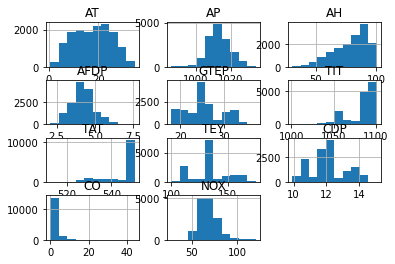

In [8]:
data.hist()

In [9]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [10]:
x = data.drop(labels = 'TEY', axis = 1)
y = data[['TEY']]

In [11]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [12]:
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
#converting into standard form.
sclar = MinMaxScaler()
scale_data = sclar.fit_transform(x)
scale_data

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [15]:
x_train,x_test,y_train,y_test = train_test_split(scale_data,y,test_size = 0.30,random_state = 12)

# Tuning of Hyperparameters :- Batch Size and Epochs

In [16]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam,RMSprop

In [17]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
    return model

In [18]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

<ipython-input-18-b84a416b9735>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=  26.4s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=  12.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=  12.8s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=  12.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=  13.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

In [19]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00038000238710083066, using {'batch_size': 10, 'epochs': 50}
0.0002850356278941035,0.000570071255788207 with: {'batch_size': 10, 'epochs': 10}
0.00038000238710083066,0.0005540019480234182 with: {'batch_size': 10, 'epochs': 50}
0.00038000238710083066,0.0005540019480234182 with: {'batch_size': 10, 'epochs': 100}
0.00038000238710083066,0.0005540019480234182 with: {'batch_size': 20, 'epochs': 10}
0.0002850356278941035,0.000570071255788207 with: {'batch_size': 20, 'epochs': 50}
0.00038000238710083066,0.0005540019480234182 with: {'batch_size': 20, 'epochs': 100}
0.0002850356278941035,0.000570071255788207 with: {'batch_size': 40, 'epochs': 10}
0.00038000238710083066,0.0005540019480234182 with: {'batch_size': 40, 'epochs': 50}
0.00038000238710083066,0.0005540019480234182 with: {'batch_size': 40, 'epochs': 100}


# Tuning of Hyperparameters:- Learning rate and Drop out rate

In [20]:
from keras.layers import Dropout

# Defining the model
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'relu'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

In [21]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


<ipython-input-21-0d012d209e12>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   4.0s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   3.9s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   3.9s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   3.8s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   4.2s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END ......dropout_rate=0.0, learnin

In [22]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00038000238710083066, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.00018997863517142833,0.00023267537003559836 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.00038000238710083066,0.0005540019480234182 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
9.501187596470118e-05,0.0001900237519294024 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.0002850356278941035,0.000570071255788207 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.00038000238710083066,0.0005540019480234182 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.00038000238710083066,0.0005540019480234182 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.00038000238710083066,0.0005540019480234182 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.00038000238710083066,0.0005540019480234182 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.00038000238710083066,0.0005540019480234182 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [23]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'relu'))
    
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

In [24]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

<ipython-input-24-06b2e48c346f>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=   5.9s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=   4.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=   4.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=   4.8s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=   4.4s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................
[CV 1/5; 2/12] END .activation_function=softmax,

In [25]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00038000238710083066, using {'activation_function': 'softmax', 'init': 'uniform'}
0.00038000238710083066,0.0005540019480234182 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.00038000238710083066,0.0005540019480234182 with: {'activation_function': 'softmax', 'init': 'normal'}
0.00038000238710083066,0.0005540019480234182 with: {'activation_function': 'softmax', 'init': 'zero'}
0.00038000238710083066,0.0005540019480234182 with: {'activation_function': 'relu', 'init': 'uniform'}
0.00038000238710083066,0.0005540019480234182 with: {'activation_function': 'relu', 'init': 'normal'}
9.501187596470118e-05,0.0001900237519294024 with: {'activation_function': 'relu', 'init': 'zero'}
0.00038000238710083066,0.0005540019480234182 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.00038000238710083066,0.0005540019480234182 with: {'activation_function': 'tanh', 'init': 'normal'}
9.501187596470118e-05,0.0001900237519294024 with: {'activation_function': 'tanh', 'init': 'zer

# Tuning of Hyperparameter :-Number of Neurons in activation layer

In [26]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'relu'))
    
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

In [27]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

<ipython-input-27-47a81517a0db>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   4.2s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   4.2s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   4.2s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   4.1s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   4.3s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ......................neuron1=4

In [28]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00038000238710083066, using {'neuron1': 4, 'neuron2': 2}
0.00038000238710083066,0.0005540019480234182 with: {'neuron1': 4, 'neuron2': 2}
0.00038000238710083066,0.0005540019480234182 with: {'neuron1': 4, 'neuron2': 4}
0.00038000238710083066,0.0005540019480234182 with: {'neuron1': 4, 'neuron2': 8}
0.00038000238710083066,0.0005540019480234182 with: {'neuron1': 8, 'neuron2': 2}
0.00038000238710083066,0.0005540019480234182 with: {'neuron1': 8, 'neuron2': 4}
0.00038000238710083066,0.0005540019480234182 with: {'neuron1': 8, 'neuron2': 8}
0.00038000238710083066,0.0005540019480234182 with: {'neuron1': 16, 'neuron2': 2}
0.00038000238710083066,0.0005540019480234182 with: {'neuron1': 16, 'neuron2': 4}
0.00038000238710083066,0.0005540019480234182 with: {'neuron1': 16, 'neuron2': 8}


# Training model with optimum values of Hyperparameters

In [48]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(12,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'relu'))
    
    optimizer = RMSprop(learning_rate = 0.1) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'mean_squared_error',optimizer = optimizer,metrics = ['accuracy'])
    return model

In [50]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

<ipython-input-50-fde82b13e58c>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


In [51]:
model.fit(x_train,y_train,batch_size = 100,epochs = 40)
y_pred =model.predict(x_train)

In [54]:
from sklearn.metrics import accuracy_score , mean_absolute_error , mean_squared_error

In [55]:
mean_absolute_error(y_train,y_pred)

33.90214211076281

In [56]:
mean_squared_error(y_train ,y_pred)

1400.4126835090726

In [58]:
y_test_pred = model.predict(x_test)

In [59]:
mean_absolute_error(y_test,y_test_pred)

33.78995567375887

In [60]:
mean_squared_error(y_test ,y_test_pred)

1391.1581578014188